In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer

In [2]:
import plotly as py
import plotly.graph_objs as go
import numpy as np

py.offline.init_notebook_mode(connected=True)

In [3]:
h = pd.read_csv(r'C:\Users\Aziz_Shameem\Documents\WiDS_IPL\Tables\matches.csv')
h.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
h.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [5]:
h.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [6]:
h[h['city'].isna()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [7]:
h['city'] = h['city'].fillna('Dubai')

In [8]:
h = h.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True)

In [9]:
h = h.drop(['umpire3'], axis=1)

In [10]:
h = h[h.winner.notna()]

## EDA

In [11]:
season_wins = h.groupby(['season','winner']).size().sort_values()

max_team_wins = []
for year in range(2008, 2020) :
    m = season_wins[year].index[-1]
    wins = season_wins[year][-1]
    max_team_wins.append([year, m, wins])
    print(f"In year {year}, {m} had the maximum No.of wins, Number : {wins}")

max_wins_data = pd.DataFrame(max_team_wins, columns=['Year','Team','Wins'])

In year 2008, Rajasthan Royals had the maximum No.of wins, Number : 13
In year 2009, Delhi Daredevils had the maximum No.of wins, Number : 10
In year 2010, Mumbai Indians had the maximum No.of wins, Number : 11
In year 2011, Chennai Super Kings had the maximum No.of wins, Number : 11
In year 2012, Kolkata Knight Riders had the maximum No.of wins, Number : 12
In year 2013, Mumbai Indians had the maximum No.of wins, Number : 13
In year 2014, Kings XI Punjab had the maximum No.of wins, Number : 12
In year 2015, Mumbai Indians had the maximum No.of wins, Number : 10
In year 2016, Sunrisers Hyderabad had the maximum No.of wins, Number : 11
In year 2017, Mumbai Indians had the maximum No.of wins, Number : 12
In year 2018, Chennai Super Kings had the maximum No.of wins, Number : 11
In year 2019, Mumbai Indians had the maximum No.of wins, Number : 11


In [12]:
max_wins_data

,Year,Team,Wins
0,2008,Rajasthan Royals,13
1,2009,Delhi Daredevils,10
2,2010,Mumbai Indians,11
3,2011,Chennai Super Kings,11
4,2012,Kolkata Knight Riders,12
5,2013,Mumbai Indians,13
6,2014,Kings XI Punjab,12
7,2015,Mumbai Indians,10
8,2016,Sunrisers Hyderabad,11
9,2017,Mumbai Indians,12


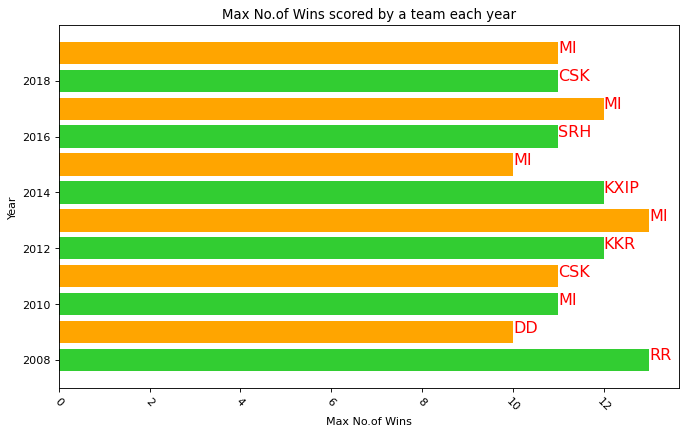

In [13]:
conv = {'Rajasthan Royals':'RR', 
        'Mumbai Indians' : 'MI',
        'Chennai Super Kings':'CSK',
        'Kolkata Knight Riders':'KKR',
        'Kings XI Punjab':'KXIP',
        'Sunrisers Hyderabad':'SRH',
        'Delhi Daredevils':'DD'
       
       }
def addlabels(x,y):
    src = list(max_wins_data['Team'])
    for i in range(len(x)):
        plt.text(y[i],x[i], conv[src[i]], size='x-large', color='red')

plt.figure(figsize=(10, 6), dpi=80)
plt.barh(y=max_wins_data['Year'], width=max_wins_data['Wins'], color=['limegreen','orange'])
plt.xticks(rotation=-45)
plt.title('Max No.of Wins scored by a team each year')
plt.ylabel('Year')
plt.xlabel('Max No.of Wins')
addlabels(list(max_wins_data['Year']), list(max_wins_data['Wins']))
plt.show()

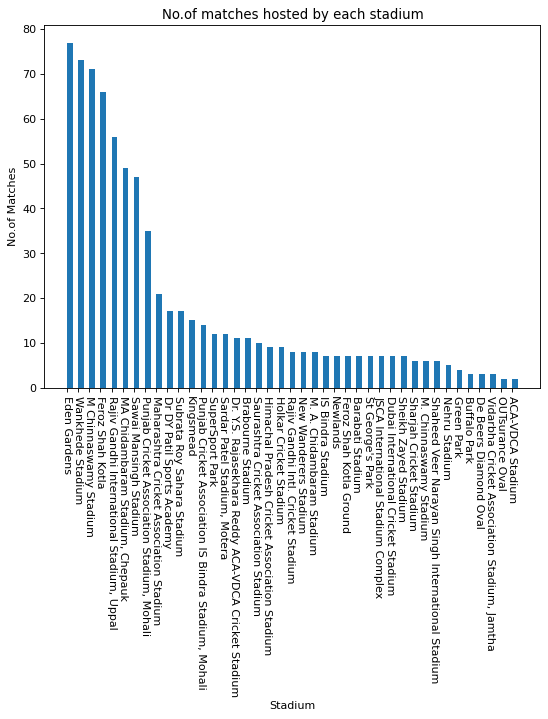

In [14]:
from matplotlib.pyplot import figure

plt.figure(figsize=(8, 6), dpi=80)
plt.bar(x=h.value_counts('venue').index, height=list(h.value_counts('venue')), width=0.5, align='edge')
plt.xticks(rotation=-90)
plt.title('No.of matches hosted by each stadium')
plt.ylabel('No.of Matches')
plt.xlabel('Stadium')
plt.show()
#plt.savefig('eda2.png')

In [15]:
tally = []
for team in list(h['team1'].unique()) :
    matches_df = pd.concat([h[h.team1==team], h[h.team2==team]])
    count = matches_df.value_counts('winner')
    wins = count[0]
    total = count.sum()
    percentage = 100.0*wins/total
    tally.append([team, percentage, wins, total-wins])
    print(f"The team {team} has a win percentage of {percentage} %, with {wins} wins and {total-wins} losses")

team_wins_tally = pd.DataFrame(tally, columns=['Team','Percentage','Wins','Losses']).sort_values('Percentage')

The team Sunrisers Hyderabad has a win percentage of 53.7037037037037 %, with 58 wins and 50 losses
The team Mumbai Indians has a win percentage of 58.288770053475936 %, with 109 wins and 78 losses
The team Gujarat Lions has a win percentage of 43.333333333333336 %, with 13 wins and 17 losses
The team Rising Pune Supergiant has a win percentage of 50.0 %, with 15 wins and 15 losses
The team Royal Challengers Bangalore has a win percentage of 47.45762711864407 %, with 84 wins and 93 losses
The team Kolkata Knight Riders has a win percentage of 51.68539325842696 %, with 92 wins and 86 losses
The team Delhi Daredevils has a win percentage of 42.138364779874216 %, with 67 wins and 92 losses
The team Kings XI Punjab has a win percentage of 46.59090909090909 %, with 82 wins and 94 losses
The team Chennai Super Kings has a win percentage of 60.97560975609756 %, with 100 wins and 64 losses
The team Rajasthan Royals has a win percentage of 51.724137931034484 %, with 75 wins and 70 losses
The te

In [16]:
team_wins_tally

,Team,Percentage,Wins,Losses
12,Pune Warriors,26.666667,12,33
10,Deccan Chargers,38.666667,29,46
6,Delhi Daredevils,42.138365,67,92
11,Kochi Tuskers Kerala,42.857143,6,8
2,Gujarat Lions,43.333333,13,17
7,Kings XI Punjab,46.590909,82,94
4,Royal Challengers Bangalore,47.457627,84,93
3,Rising Pune Supergiant,50.000000,15,15
5,Kolkata Knight Riders,51.685393,92,86
9,Rajasthan Royals,51.724138,75,70


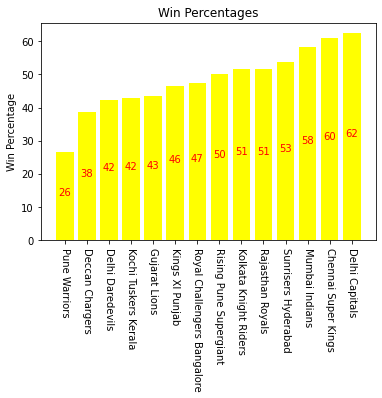

In [17]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(x[i],0.5*y[i], int(y[i]), size='medium', color='red', horizontalalignment='center')

plt.bar(x=team_wins_tally['Team'], height=team_wins_tally['Percentage'], color='yellow')
plt.xticks(rotation = -90)
plt.ylabel('Win Percentage')
addlabels(list(team_wins_tally['Team']), list(team_wins_tally['Percentage']))
plt.title('Win Percentages')
plt.show()

In [18]:
tally_tosses = []
for team in list(h['team1'].unique()) :
    matches_df = pd.concat([h[h.team1==team], h[h.team2==team]])
    count = matches_df.value_counts('toss_winner')
    wins = count[0]
    total = count.sum()
    percentage = 100.0*wins/total
    tally_tosses.append([team, percentage, wins, total-wins])
    print(f"The team {team} has a toss-win percentage of {percentage} %, with {wins} wins and {total-wins} losses")

toss_wins_tally = pd.DataFrame(tally_tosses, columns=['Team','Percentage','Wins','Losses']).sort_values('Percentage')

The team Sunrisers Hyderabad has a toss-win percentage of 42.592592592592595 %, with 46 wins and 62 losses
The team Mumbai Indians has a toss-win percentage of 52.406417112299465 %, with 98 wins and 89 losses
The team Gujarat Lions has a toss-win percentage of 50.0 %, with 15 wins and 15 losses
The team Rising Pune Supergiant has a toss-win percentage of 43.333333333333336 %, with 13 wins and 17 losses
The team Royal Challengers Bangalore has a toss-win percentage of 45.19774011299435 %, with 80 wins and 97 losses
The team Kolkata Knight Riders has a toss-win percentage of 51.68539325842696 %, with 92 wins and 86 losses
The team Delhi Daredevils has a toss-win percentage of 49.685534591194966 %, with 79 wins and 80 losses
The team Kings XI Punjab has a toss-win percentage of 46.02272727272727 %, with 81 wins and 95 losses
The team Chennai Super Kings has a toss-win percentage of 54.26829268292683 %, with 89 wins and 75 losses
The team Rajasthan Royals has a toss-win percentage of 53.79

In [19]:
toss_wins_tally

,Team,Percentage,Wins,Losses
0,Sunrisers Hyderabad,42.592593,46,62
3,Rising Pune Supergiant,43.333333,13,17
12,Pune Warriors,44.444444,20,25
4,Royal Challengers Bangalore,45.197740,80,97
7,Kings XI Punjab,46.022727,81,95
6,Delhi Daredevils,49.685535,79,80
2,Gujarat Lions,50.000000,15,15
5,Kolkata Knight Riders,51.685393,92,86
1,Mumbai Indians,52.406417,98,89
9,Rajasthan Royals,53.793103,78,67


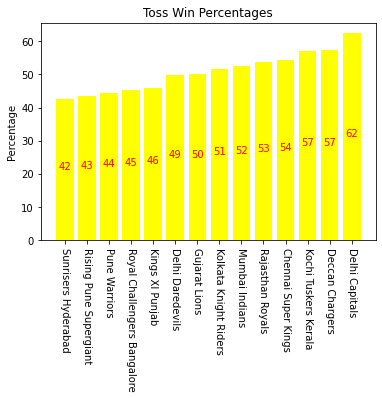

In [20]:
plt.bar(x=toss_wins_tally['Team'], height=toss_wins_tally['Percentage'], color='yellow')
plt.xticks(rotation = -90)
plt.ylabel('Percentage')
addlabels(list(toss_wins_tally['Team']), list(toss_wins_tally['Percentage']))
plt.title('Toss Win Percentages')
plt.show()

## ..........................................................................

In [21]:
ballData = pd.read_csv(r'C:\Users\Aziz_Shameem\Documents\WiDS_IPL\Tables\deliveries.csv')

In [22]:
ballData.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [23]:
ballData.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [24]:
yearly_runs = {i:0 for i in sorted(list(h.season.unique()))}
for id in h.id.unique() :
    year = int(h[h.id==id]['season'])
    runs = ballData[ballData['match_id']==1]['total_runs'].sum()
    yearly_runs[year] += runs

yearly_runs

{2008: 21982,
 2009: 21603,
 2010: 22740,
 2011: 27288,
 2012: 28046,
 2013: 28804,
 2014: 22740,
 2015: 21603,
 2016: 22740,
 2017: 22361,
 2018: 22740,
 2019: 22361}

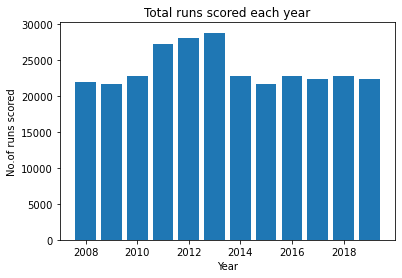

In [25]:
plt.bar(x=yearly_runs.keys(), height=yearly_runs.values())
plt.title('Total runs scored each year')
plt.ylabel('No.of runs scored')
plt.xlabel('Year')
plt.show()

In [26]:
# No.of matches played each year
h[['id','season']].groupby('season').size()

season
2008    58
2009    57
2010    60
2011    72
2012    74
2013    76
2014    60
2015    57
2016    60
2017    59
2018    60
2019    59
dtype: int64

In [27]:
kohli_yearly_runs = {i:0 for i in sorted(list(h.season.unique()))}
for id in h.id.unique() :
    year = int(h[h.id==id]['season'])
    runs = ballData[ballData['match_id']==id][ballData['batsman']=='V Kohli']['batsman_runs'].sum()
    kohli_yearly_runs[year] += runs

print(kohli_yearly_runs)




<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match D

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match D

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match D

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match D

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match D

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match D

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match D

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match D

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match D

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match D

{2008: 165, 2009: 246, 2010: 307, 2011: 557, 2012: 364, 2013: 639, 2014: 359, 2015: 503, 2016: 973, 2017: 308, 2018: 539, 2019: 447}


<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-27-c0acaf7dd58c>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



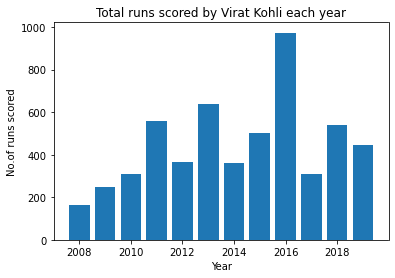

In [28]:
plt.bar(x=yearly_runs.keys(), height=kohli_yearly_runs.values())
plt.title('Total runs scored by Virat Kohli each year')
plt.ylabel('No.of runs scored')
plt.xlabel('Year')
plt.show()

In [29]:
#top 10 greatest voctories by runs

ten_by_runs = h.sort_values(by = 'win_by_runs', ascending=False).iloc[:10]
ten_by_runs

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
43,44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan
619,620,2016,Bangalore,2016-05-14,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,normal,0,Royal Challengers Bangalore,144,0,AB de Villiers,M Chinnaswamy Stadium,AY Dandekar,VK Sharma
59,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen
556,557,2015,Bangalore,2015-05-06,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bangalore,138,0,CH Gayle,M Chinnaswamy Stadium,RK Illingworth,VA Kulkarni
410,411,2013,Bangalore,2013-04-23,Royal Challengers Bangalore,Pune Warriors,Pune Warriors,field,normal,0,Royal Challengers Bangalore,130,0,CH Gayle,M Chinnaswamy Stadium,Aleem Dar,C Shamshuddin
706,11147,2019,Hyderabad,31/03/19,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,118,0,J Bairstow,Rajiv Gandhi Intl. Cricket Stadium,S Ravi,KN Anantapadmanabhan
295,296,2011,Dharamsala,2011-05-17,Kings XI Punjab,Royal Challengers Bangalore,Kings XI Punjab,bat,normal,0,Kings XI Punjab,111,0,AC Gilchrist,Himachal Pradesh Cricket Association Stadium,Asad Rauf,AM Saheba
114,115,2008,Mumbai,2008-05-30,Rajasthan Royals,Delhi Daredevils,Delhi Daredevils,field,normal,0,Rajasthan Royals,105,0,SR Watson,Wankhede Stadium,BF Bowden,RE Koertzen
676,7934,2018,Kolkata,09/05/18,Mumbai Indians,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Mumbai Indians,102,0,Ishan Kishan,Eden Gardens,Anil Chaudhary,K Ananthapadmanabhan
182,183,2010,Delhi,2010-03-17,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,98,0,SR Tendulkar,Feroz Shah Kotla,BR Doctrove,SK Tarapore


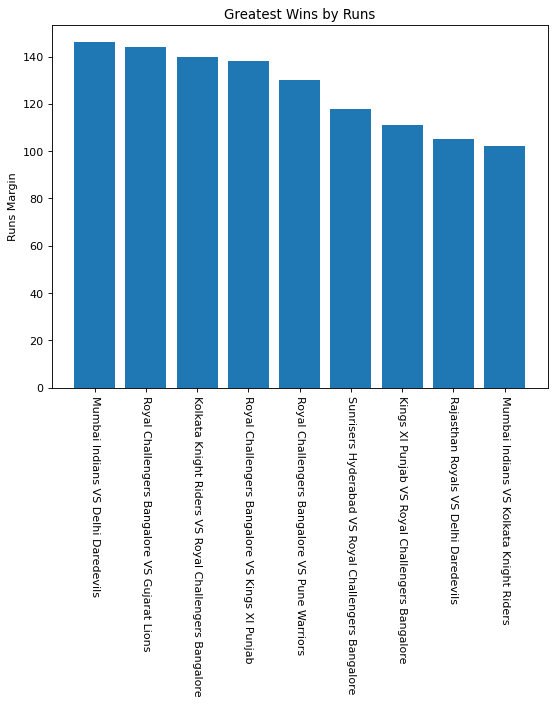

In [30]:
winners = list(ten_by_runs['team1'])
losers = list(ten_by_runs['team2'])
y = [winner +' VS ' + loser for winner,loser in zip(winners, losers)]
figure(figsize=(8, 6), dpi=80)
plt.bar(x=y, height=ten_by_runs['win_by_runs'])
plt.xticks(rotation=-90)

plt.title('Greatest Wins by Runs')
plt.ylabel('Runs Margin')
plt.show()

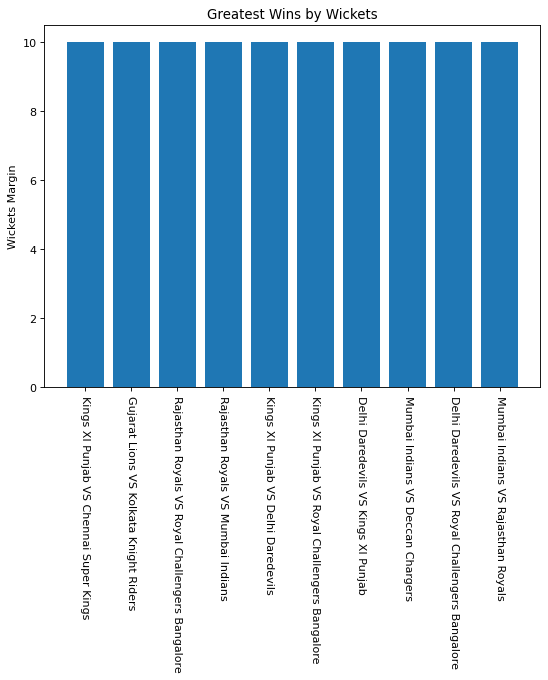

In [31]:
#top 10 greatest voctories by wickets

ten_by_wickets = h.sort_values(by = 'win_by_wickets', ascending=False).iloc[:10]
winners2 = list(ten_by_wickets['team1'])
losers2 = list(ten_by_wickets['team2'])
y2 = [winner +' VS ' + loser for winner,loser in zip(winners2, losers2)]
figure(figsize=(8, 6), dpi=80)
plt.bar(x=y2, height=ten_by_wickets['win_by_wickets'])
plt.xticks(rotation=-90)

plt.title('Greatest Wins by Wickets')
plt.ylabel('Wickets Margin')
plt.show()

## Dataset on Player Performances

In [32]:
player_info = pd.read_csv(r'C:\Users\Aziz_Shameem\Documents\WiDS_IPL\Tables\Training.csv')
player_info

,Id,Runs,Boundaries,Six,Fifty,Hundred,Duck,Batting_Points,Wickets,4W_Haul,5W_Haul,Maidens,Bowling_Points,Total Points
0,1_Bipul Sharma,0,0,0,0,0,0,0,1,0,0,0,25,25
1,1_DJ Hooda,16,1,1,0,0,0,19,1,0,0,0,25,44
2,1_KM Jadhav,31,5,1,0,0,0,38,0,0,0,0,0,38
3,1_Mandeep Singh,24,5,0,0,0,0,29,0,0,0,0,0,29
4,1_Yuvraj Singh,62,10,3,1,0,0,86,0,0,0,0,0,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15911,11415_RA Jadeja,9,1,0,0,0,0,10,0,0,0,0,0,10
15912,11415_Harbhajan Singh,0,0,0,0,0,0,0,0,0,0,0,0,0
15913,11415_RG Sharma,15,2,1,0,0,0,19,0,0,0,0,0,19
15914,11415_SN Thakur,2,0,0,0,0,0,2,2,0,0,0,50,52


In [33]:
# Most no.of Fifties

fifties = {}
for num,i in enumerate(list(player_info.Id)) :
    temp = player_info[player_info.Id==i]
    runs = int(temp['Runs'])
    t = temp['Id'].get(num)
    if t : [match, player] = t.split('_')
    if player not in fifties.keys() :
        if runs>=50 : fifties[player] = 1
    else :
        if runs>=50 : fifties[player] += 1
fifties = dict(sorted(fifties.items(), key=lambda item: item[1], reverse=True))
fifties

{'DA Warner': 48,
 'V Kohli': 43,
 'SK Raina': 39,
 'AB de Villiers': 37,
 'S Dhawan': 37,
 'RG Sharma': 37,
 'G Gambhir': 36,
 'CH Gayle': 35,
 'AM Rahane': 29,
 'RV Uthappa': 24,
 'MS Dhoni': 23,
 'SR Watson': 23,
 'SE Marsh': 21,
 'AT Rayudu': 20,
 'KD Karthik': 18,
 'V Sehwag': 18,
 'DR Smith': 17,
 'JH Kallis': 17,
 'KL Rahul': 17,
 'MK Pandey': 16,
 'MEK Hussey': 16,
 'BB McCullum': 15,
 'YK Pathan': 15,
 'M Vijay': 15,
 'SV Samson': 14,
 'KA Pollard': 14,
 'SR Tendulkar': 14,
 'JP Duminy': 14,
 'Yuvraj Singh': 13,
 'RR Pant': 13,
 'KS Williamson': 13,
 'SS Iyer': 13,
 'AJ Finch': 13,
 'PA Patel': 13,
 'AC Gilchrist': 13,
 'LMP Simmons': 12,
 'F du Plessis': 12,
 'R Dravid': 11,
 'S Badrinath': 11,
 'DPMD Jayawardene': 11,
 'DA Miller': 11,
 'AD Russell': 11,
 'Q de Kock': 11,
 'CA Lynn': 10,
 'KK Nair': 10,
 'KC Sangakkara': 10,
 'SPD Smith': 9,
 'JC Buttler': 9,
 'TM Dilshan': 9,
 'N Rana': 8,
 'ML Hayden': 8,
 'WP Saha': 7,
 'MK Tiwary': 7,
 'SS Tiwary': 7,
 'SC Ganguly': 7,
 

In [34]:
# Most no.of Hundreds

hunds = {}
for num,i in enumerate(list(player_info.Id)) :
    temp = player_info[player_info.Id==i]
    runs = int(temp['Runs'])
    t = temp['Id'].get(num)
    if t : [match, player] = t.split('_')
    if player not in hunds.keys() :
        if runs>=100 : hunds[player] = 1
    else :
        if runs>=100 : hunds[player] += 1
hunds = dict(sorted(hunds.items(), key=lambda item: item[1], reverse=True))
hunds

{'CH Gayle': 7,
 'V Kohli': 5,
 'DA Warner': 4,
 'SR Watson': 4,
 'AB de Villiers': 3,
 'SV Samson': 2,
 'HM Amla': 2,
 'BB McCullum': 2,
 'AC Gilchrist': 2,
 'M Vijay': 2,
 'V Sehwag': 2,
 'AM Rahane': 2,
 'KL Rahul': 2,
 'BA Stokes': 1,
 'MEK Hussey': 1,
 'A Symonds': 1,
 'ST Jayasuriya': 1,
 'SE Marsh': 1,
 'MK Pandey': 1,
 'YK Pathan': 1,
 'DPMD Jayawardene': 1,
 'PC Valthaty': 1,
 'SR Tendulkar': 1,
 'KP Pietersen': 1,
 'RG Sharma': 1,
 'SK Raina': 1,
 'DA Miller': 1,
 'LMP Simmons': 1,
 'WP Saha': 1,
 'Q de Kock': 1,
 'SPD Smith': 1,
 'RR Pant': 1,
 'AT Rayudu': 1,
 'P Shaw': 1,
 'J Bairstow': 1,
 'KD Karthik': 1}

In [35]:
data = {key:val for key,val in list(fifties.items())[:15]}
data2 = {key:val for key,val in list(hunds.items())[:15]}

x = list(data.keys())
y1 = list(data.values())
y2 = list(data2.values())

layout = go.Layout(
    title='MOST NO. OF FIFTIES',
    yaxis=dict(
        title='Number'
    ),
    xaxis=dict(
        title='Batsman'
    )
)

trace1 = go.Scatter(
    x=x,
    y=y1,
    mode='markers+lines',
    marker=dict(size=12, color='green'),
    name='fifties'

)



fig = go.Figure(data=[trace1], layout=layout)
py.offline.iplot(fig)

In [36]:
data = {key:val for key,val in list(fifties.items())[:15]}
data2 = {key:val for key,val in list(hunds.items())[:15]}

x = list(data2.keys())
y1 = list(data.values())
y2 = list(data2.values())

layout = go.Layout(
    title='MOST NO. OF HUNDREDS',
    yaxis=dict(
        title='Number'
    ),
    xaxis=dict(
        title='Batsman'
    )
)

trace2 = go.Scatter(
    x=x,
    y=y2,
    mode='markers+lines',
    marker=dict(size=12, color='blue'),
    name='hundreds'

)



fig = go.Figure(data=[trace2], layout=layout)
py.offline.iplot(fig)






In [37]:
micsk = h.loc[((h.team1=='Mumbai Indians') & (h.team2=='Chennai Super Kings')) | ((h.team1=='Chennai Super Kings') & (h.team2=='Mumbai Indians'))]
data = {i:'' for i in list(micsk['id'].unique())}
for i in list(micsk['id'].unique()) :
    temp = micsk[micsk.id==i]['winner'].get(micsk[micsk.id==i]['winner'].index[0]) 
    year = micsk[micsk.id==i]['season'].get(micsk[micsk.id==i]['season'].index[0])
    data[i] = str(year) + '_' + temp

In [38]:
m = {c:0 for c in range(2008,2020)}
c = {c:0 for c in range(2008,2020)}

for t in list(data.values()) :
    [year, team] = t.split('_')
    if team=='Mumbai Indians' :
        m[int(year)] += 1
    else :
        c[int(year)] += 1
    


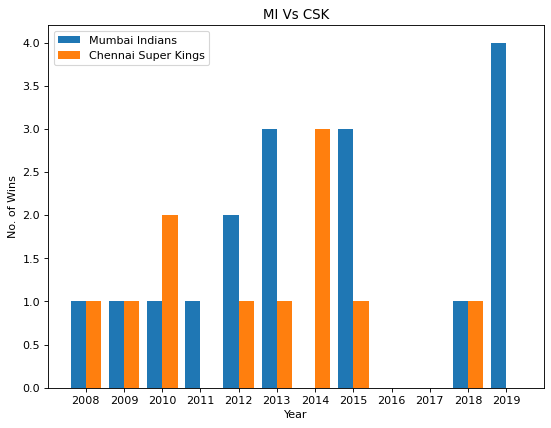

In [39]:
x = [str(year) for year in m.keys()]
xaxis = np.arange(len(x))
#x = list(m.keys())

figure(figsize=(8, 6), dpi=80)
plt.bar(xaxis-0.2, list(m.values()), width=0.4, label='Mumbai Indians')
plt.bar(xaxis+0.2, list(c.values()), width=0.4, label='Chennai Super Kings')
plt.xticks(xaxis, x)
plt.title('MI Vs CSK')
plt.ylabel('No. of Wins')
plt.xlabel('Year')
plt.legend()
plt.show()

In [40]:
# Function for comparison between teams

def compare(team1, team2) :
    micsk = h.loc[((h.team1==team1) & (h.team2==team2)) | ((h.team1==team2) & (h.team2==team1))]
    data = {i:'' for i in list(micsk['id'].unique())}
    for i in list(micsk['id'].unique()) :
        temp = micsk[micsk.id==i]['winner'].get(micsk[micsk.id==i]['winner'].index[0]) 
        year = micsk[micsk.id==i]['season'].get(micsk[micsk.id==i]['season'].index[0])
        data[i] = str(year) + '_' + temp
        
    m = {c:0 for c in range(2008,2020)}
    c = {c:0 for c in range(2008,2020)}

    for t in list(data.values()) :
        [year, team] = t.split('_')
        if team==team1 :
            m[int(year)] += 1
        else :
            c[int(year)] += 1
    
    x = [str(year) for year in m.keys()]
    xaxis = np.arange(len(x))
    #x = list(m.keys())

    figure(figsize=(8, 6), dpi=80)
    plt.bar(xaxis-0.2, list(m.values()), width=0.4, label=team1)
    plt.bar(xaxis+0.2, list(c.values()), width=0.4, label=team2)
    plt.xticks(xaxis, x)
    plt.title(team1 + ' Vs ' + team2)
    plt.ylabel('No. of Wins')
    plt.xlabel('Year')
    plt.legend()
    plt.show()

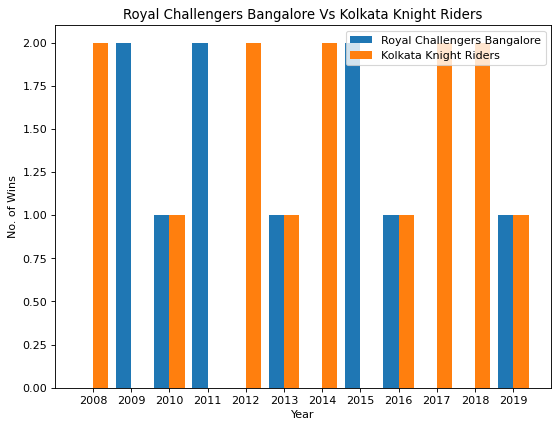

In [41]:
compare('Royal Challengers Bangalore', 'Kolkata Knight Riders')

In [42]:
d = player_info[['Id','Batting_Points','Bowling_Points']]
d

,Id,Batting_Points,Bowling_Points
0,1_Bipul Sharma,0,25
1,1_DJ Hooda,19,25
2,1_KM Jadhav,38,0
3,1_Mandeep Singh,29,0
4,1_Yuvraj Singh,86,0
...,...,...,...
15911,11415_RA Jadeja,10,0
15912,11415_Harbhajan Singh,0,0
15913,11415_RG Sharma,19,0
15914,11415_SN Thakur,2,50


In [43]:
player_info.head()

,Id,Runs,Boundaries,Six,Fifty,Hundred,Duck,Batting_Points,Wickets,4W_Haul,5W_Haul,Maidens,Bowling_Points,Total Points
0,1_Bipul Sharma,0,0,0,0,0,0,0,1,0,0,0,25,25
1,1_DJ Hooda,16,1,1,0,0,0,19,1,0,0,0,25,44
2,1_KM Jadhav,31,5,1,0,0,0,38,0,0,0,0,0,38
3,1_Mandeep Singh,24,5,0,0,0,0,29,0,0,0,0,0,29
4,1_Yuvraj Singh,62,10,3,1,0,0,86,0,0,0,0,0,86


In [44]:
bat_points = {}
bowl_points = {}
for num,i in enumerate(list(player_info.Id)) :
    temp = player_info[player_info.Id==i]
    bat = int(temp['Batting_Points'])
    bowl = int(temp['Bowling_Points'])
    t = temp['Id'].get(temp['Id'].index[0])
    [x, player] = t.split('_')
    if player not in bat_points.keys() :
        bat_points[player] = bat
    else :
        bat_points[player] += bat
        
    if player not in bowl_points.keys() :
        bowl_points[player] = bowl
    else :
        bowl_points[player] += bowl
    


In [45]:
# Function to compare between batsmen
# Input : a list of batsmen for comparison

def bat_compare(batsmen) :
    x = batsmen
    y = list(bat_points.values())[:len(batsmen)]

    layout = go.Layout(
        title='BATSMEN COMPARISON',
        yaxis=dict(
            title='Batting Points'
        ),
        xaxis=dict(
            title='Batsman'
        )
    )

    trace1 = go.Scatter(
        x=x,
        y=y,
        mode='markers',
        marker=dict(size=12, color='grey'),
        name='comparison'

    )



    fig = go.Figure(data=[trace1], layout=layout)
    py.offline.iplot(fig)

In [99]:
bat_compare(list(bat_points.keys())[:30])

In [100]:
# Function to compare between bowlers
# Input : a list of bowlers for comparison

def bowl_compare(bowlers) :
    x = bowlers
    y = list(bowl_points.values())[:len(bowlers)]

    layout = go.Layout(
        title='BOWLERS COMPARISON',
        yaxis=dict(
            title='Bowling Points'
        ),
        xaxis=dict(
            title='Bowler'
        )
    )

    trace1 = go.Scatter(
        x=x,
        y=y,
        mode='markers',
        marker=dict(size=12, color='grey'),
        name='comparison'

    )



    fig = go.Figure(data=[trace1], layout=layout)
    py.offline.iplot(fig)

In [101]:
bowl_compare(list(bowl_points.keys())[:30])

In [106]:
vk_runs = {}
vk_balls = {}
for over in range(1,21) :
    vk_runs[over] = ballData[ballData.batsman=='V Kohli'][ballData.over==over]['batsman_runs'].sum()
    vk_balls[over] = ballData[ballData.batsman=='V Kohli'][ballData.over==over]['ball'].size


<ipython-input-106-b46c9fb13507>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-106-b46c9fb13507>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-106-b46c9fb13507>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-106-b46c9fb13507>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-106-b46c9fb13507>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-106-b46c9fb13507>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-106-b46c9fb13507>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-106-b46c9fb13507>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-106-b46c9fb13507>:4: UserWarning:

Boolean Series key will be reindexed t

In [107]:
(ballData[ballData.batsman=='V Kohli'][ballData.over==5]['batsman_runs'].sum()*100)/(ballData[ballData.batsman=='V Kohli'][ballData.over==5]['ball'].size)

<ipython-input-107-e2fa5ed8298c>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-107-e2fa5ed8298c>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



108.0

In [108]:
list(dict(sorted(bat_points.items(), key=lambda item: item[1], reverse=True)).keys())[:15]

['V Kohli',
 'SK Raina',
 'CH Gayle',
 'RG Sharma',
 'DA Warner',
 'AB de Villiers',
 'S Dhawan',
 'MS Dhoni',
 'RV Uthappa',
 'G Gambhir',
 'AM Rahane',
 'SR Watson',
 'KD Karthik',
 'AT Rayudu',
 'YK Pathan']

In [109]:
data = []
bmen = list(dict(sorted(bat_points.items(), key=lambda item: item[1], reverse=True)).keys())[:20]
for batsman in bmen :
    for over in range(1,21) :
        runs = ballData[ballData.batsman==batsman][ballData.over==over]['batsman_runs'].sum()
        balls = ballData[ballData.batsman==batsman][ballData.over==over]['ball'].size
        mean_sr = (runs*100)/(balls)
        data.append([batsman, over, mean_sr, runs, balls])
Data = pd.DataFrame(data, columns=['Batsman','Over','Mean Strike Rate','Total Runs','Total Balls'])    

<ipython-input-109-8eb768040821>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:5: UserWarning:

Boolean Series key will be reindexed t

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed t

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed t

<ipython-input-109-8eb768040821>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:5: UserWarning:

Boolean Series key will be reindexed t

<ipython-input-109-8eb768040821>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:5: UserWarning:

Boolean Series key will be reindexed t

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed t

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed t

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed t

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed t

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed t

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:7: RuntimeWarning:

invalid value encountered in longlong_scalars

<ipython-input-109-8eb768040821>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-109-8eb768040821>:5: UserWarning:

Boolean Series key will be reindexed to match DataFr

In [110]:
Data

,Batsman,Over,Mean Strike Rate,Total Runs,Total Balls
0,V Kohli,1,107.182320,194,181
1,V Kohli,2,107.500000,258,240
2,V Kohli,3,118.490566,314,265
3,V Kohli,4,124.150943,329,265
4,V Kohli,5,108.000000,270,250
...,...,...,...,...,...
395,PA Patel,16,123.076923,32,26
396,PA Patel,17,168.750000,27,16
397,PA Patel,18,153.846154,20,13
398,PA Patel,19,130.000000,13,10


In [111]:
x1 = Data[Data.Batsman=='V Kohli']['Over']
x2 = Data[Data.Batsman=='CH Gayle']['Over']
y1 = Data[Data.Batsman=='V Kohli']['Mean Strike Rate']
y2 = Data[Data.Batsman=='CH Gayle']['Mean Strike Rate']
trace = []

l = list(Data['Batsman'].unique())
d = {player:no for no,player in enumerate(l)}

layout = go.Layout(
    title='Strike Rate Comparisons between Batsmen',
    yaxis=dict(
        title='Mean Strike Rate'
    ),
    xaxis=dict(
        title='Over'
    )
)

for batsman in bmen :
    trace.append(go.Scatter(
    x= Data[Data.Batsman==batsman]['Over'],
    y=Data[Data.Batsman==batsman]['Mean Strike Rate'],
    mode='markers',
    marker=dict(
        size = 0.08*Data[Data.Batsman==batsman]['Total Balls'],
        color=2,
        opacity=0.2,
        line=dict(
                color='Black',
                width=2
            )
    ),
    name=batsman

    ))




fig = go.Figure(data=trace, layout=layout)
py.offline.iplot(fig)